## 8.1. 경사 하강법에 숨은 의미
- gradient(경사, 기울기)는 함수가 가장 빠르게 증가할 수 있는 방향을 나타낸다.
- 따라서 함수의 최대값을 구하는 방법 중 하나는 임의의 시작점을 잡은 후, gradient를 계산하고,<br> gradient의 방향(즉 함수의 출력값이 가장 많이 증가하는 방향)으로 조금 이동하는 과정을 여러 번 반복하는 것이다.

In [1]:
def sum_of_squares(v):
    '''v에 속해 있는 항목들으리 제곱합을 계산한다.'''
    return sum(v_i ** 2 for v_i in v)

## 8.2. Gradient 계산하기
- f가 단변수 함수인 경우, 점 x에서의 미분값은 x가 아주 조금 변했을 때 f(x)의 변화량을 의미한다.
- x의 변화량을 다음 식에서는 h로 표현했으며, 아주 조금 변한다는 것을 반영하기 위해 h를 0에 점근하게 했다.
- 이때 미분값은 함수 변화율(difference quotient)의 극한값이다.

In [2]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

In [3]:
def square(x):
    return x * x

def derivative(x):
    return 2 * x

In [4]:
derivative_estimate = lambda x: differene_quotient(square, x, h=0.00001)

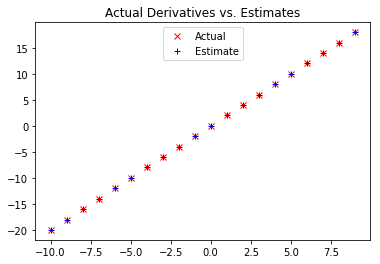

In [6]:
# 두 계산식에 따른 결과값이 거의 비슷함을 보여 주기 위한 그래프
import matplotlib.pyplot as plt    

def plot_estimated_derivative():
    
    derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)
    x = range(-10, 10)

    plt.title('Actual Derivatives vs. Estimates')
    plt.plot(x, list(map(derivative, x)), 'rx', label='Actual')  # 빨간색 x
    plt.plot(x, list(map(derivative_estimate, x)), 'b+', label='Estimate')  # 파란색 +
    plt.legend(loc=9)  # 상단 중앙 범례
    plt.show()  # 보라색 *가 나와 주길!
    
plot_estimated_derivative()

- 만약 f가 다변수 함수라면 여러 개의 입력 변수 중 하나에 작은 변화가 있을 때 f(x)의 변화량을 알려주는 편도함수(partial derivative) 역시 여러 개 존재한다.
- i번째 편도함수는, i번째 변수를 제외한 다른 모든 입력변수를 고정시켜서 계산할 수 있다.

In [7]:
def partial_difference_quotient(f, v, i, h):
    '''함수 f의 i번째 편도함수가 v에서 가지는 값'''
    w = [v_j + (h if j == i else 0)  # h를 v의 i번째 변수에만 더해주자
         for j, v_j in enumerate(v)]
    
    return(f(w) - f(v)) / h

In [8]:
def estimate_gradient(f, v, h=0.00001):
    return[partial_difference_quotient(f, v, i, h)
          for i, _ in enumerate(v)]

- 함수 두 값의 차이를 사용해서 근사하는 것의 가장 큰 단점은 계산 비용이 크다는 것이다. <br> v의 길이가 n이면 estimate_gradient 함수는 f를 2n번 계산해야 한다. <br> 따라서 gradient를 빈번하게 계산하는 경우, 불필요한 계산도 많이 하게 된다.

## 8.3. Gradient 적용하기

In [25]:
from linear_algebra import distance

def step(v, direction, step_size):
    '''v에서 step_size만큼 이동하기'''
    return [v_i + step_size * direction_i
           for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# 임의의 시작점을 선택
v = [random.randint(-10, 10) for i in range(3)]

tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v)  # v의 경사도 계산
    next_v = step(v, gradient, -0.0001)  # 경사도의 음수만큼 이동
    if distance(next_v, v) < tolerance:  # tolerance만큼 수렴하게 되면 멈춤
        break
    v = next_v  # 아니면 계속 반복

print("minimum v", v)
print("minimum value", sum_of_squares(v))

minimum v [-0.00028293269772384306, 8.083791363538443e-05, -0.00040418956817692625]
minimum value 2.4995488674526355e-07


## 8.4. 적절한 이동 거리 정하기
- 이동 거리를 고정
- 시간에 따라 이동 거리를 점차 줄임
- 이동할 때마다 목적 함수를 최소화하는 이동 거리로 정함

In [26]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

In [27]:
# 이 중 몇몇은 f에 부적합한 값을 넣어 오류를 발생시킬 수도 있다.
# f에 오류가 발생했을 때 무한대(infinity)를 반환하기로 한다.
def safe(f):
    '''f와 똑같은 함수를 반환하지만 f에 오류가 발생하면 무한대를 반환해준다'''
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')  # 파이썬에서는 무한대를 'inf'로 표기
    return safe_f

## 8.5. 종합하기

대부분의 경우 최소화하려는 함수 target_fn과 그에 대한 gradient 함수 gradient_fn이 존재한다. <br> 예를 들어, target_fn이 특정 모델의 파라미터(parameter)에 대한 오류값 함수라고 하자. 경사 하강법을 이용하면 오류값을 최소화하는 파라미터를 찾을 수 있다. <br> 더불어 파라미터 theta_0의 시작점을 (어떻게든) 구했다고 해봊. 그러면 경사 하강법을 다음과 같이 구현할 수 있다.
 

In [34]:
# minmize_batch -> 반복문을 돌 때마다 데이터셋 전체를 살펴봄

def minmize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    '''목적 함수를 최소화시키는 theta를 경사 하강법을 사용해서 찾아준다.'''
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    theta = theta_0  # theta를 시작점으로 설정
    target_fn = safe(target_fn)  # 오류를 처리할 수 있는 target_fn으로 변환
    value = target_fn(theta)  # 최소화시키려는 값
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                      for step_size in step_sizes]
        
        # 함수를 최소화시키는 theta 선택
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        # tolerance만큼 수렴하면 멈춤
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

In [35]:
def negate(f):
    '''x를 입력하면 -f(x)를 반환해 주는 함수 생성'''
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    '''f가 여러 숫자를 반환할 때 모든 숫자를 음수로 변환'''
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minmize_batch(negate(target_fn),
                        negate_all(gradient_fn),
                        theta_0,
                        tolerance)

## 8.6. SGD(stochastic gradient descent)

minmize_batch는 반복문을 돌 때마다 데이터 전체에 대해 gradient 값을 계산해야 하기 때문에 계산 시간이 오래 걸린다. <br> 그런데 대부분의 오류 함수는 더할 수 있는(additive) 속성을 가지고 있다. 즉, 데이터 전체에 대한 오류값이 각각 데이터 포인트에 대한 오류값의 합과 같다. <br> 이럴 때는 한 번 반복문을 돌 때마다 데이터 포인트 한 개에 대한 gradient를 계산하는 SGD를 사용할 수 있다. SGD는 수렴할 때까지 전체 데이터셋을 반복적으로 사용한다.

In [36]:
def in_random_order(data):
    '''임의의 순서로 data의 데이터 포인트를 반환'''
    indexes = [i for i, _ in enumerate(data)]  # 데이터 포인트의 인덱스를 list로 생성
    random.shuffle(indexes)  # 인덱스를 섞고
    for i in indexes:  # 그 순서대로 데이터를 반환
        yield data[i]

In [37]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = zip(x, y)
    theta = theta_0  # 첫 시작점
    alpha = alpha_0  # 기본 이동 거리
    min_theta, mun_value = None, float('inf')  # 시작할 때의 최솟값
    iterations_with_no_improvement = 0
    
    # 만약 100번 넘게 반복하는 동안 더 작아지지 않는다면 멈춤
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)
        
        if value < min_value:
            # 새로운 최솟값을 찾았다면 이 값을 저장하고
            # 기본 이동 거리롤 다시 돌아감
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # 만약 치ㅗ솟값이 줄어들지 않는다면 이동 거리를 축소
            iterations_with_no_improvement += 1
            alpha *= 0.9
            
        # 각 데이터 포인트에 대해 경사를 계산
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
            
    return min_theta

In [38]:
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                              negate_all(gradient_fn),
                              x, y, theta_0, alpha_0)